In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


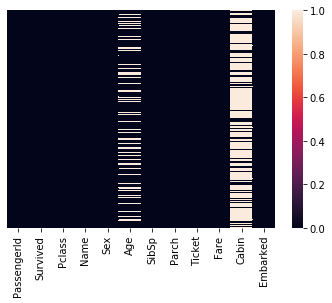

In [6]:
sns.heatmap(df.isnull(),yticklabels=False)

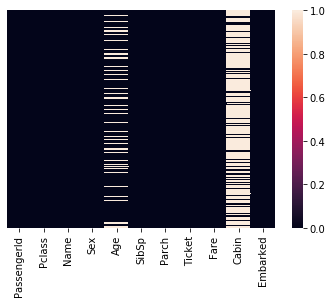

In [7]:
sns.heatmap(df2.isnull(),yticklabels=False)

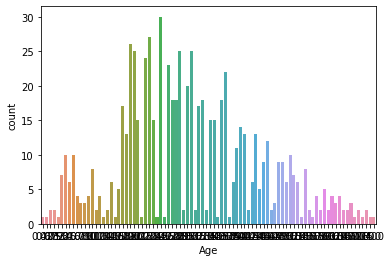

In [8]:
sns.countplot(df['Age'],)

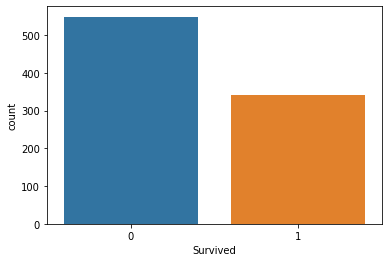

In [9]:
sns.countplot(x='Survived',data=df)

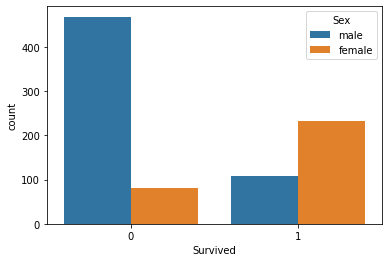

In [10]:
sns.countplot(x='Survived',hue='Sex',data=df)

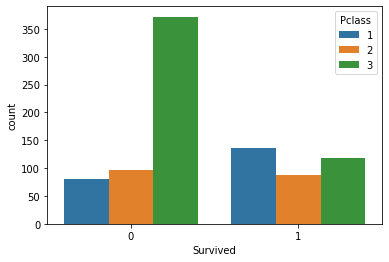

In [11]:
sns.countplot(x='Survived',hue="Pclass",data=df)

In [12]:
df1 = df.loc[(df['Sex']=="male") & (df['Pclass']==3)]

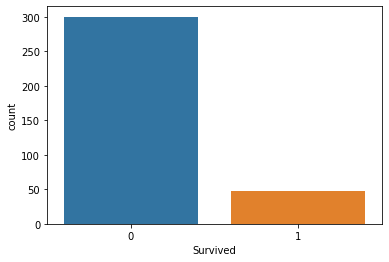

In [13]:
sns.countplot(x='Survived',data = df1)

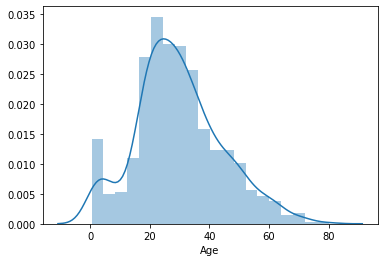

In [14]:
sns.distplot(df['Age'].dropna())

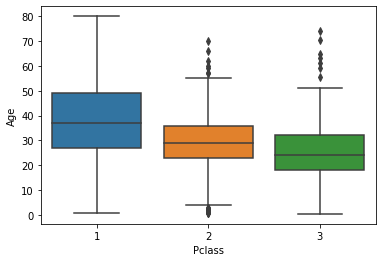

In [15]:
sns.boxplot(x='Pclass',y='Age',data=df)

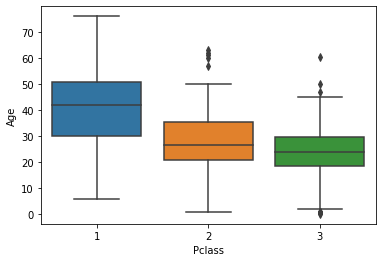

In [16]:
sns.boxplot(x='Pclass',y='Age',data=df2)

In [21]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df2['Title'] = df2.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'],df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df2['Title'] = df2['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
df2['Title'] = df2['Title'].replace('Mlle', 'Miss')
df2['Title'] = df2['Title'].replace('Ms', 'Miss')
df2['Title'] = df2['Title'].replace('Mme', 'Mrs')

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [25]:
df.Title = pd.Categorical(df.Title)
df['Title'] = df.Title.cat.codes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [26]:
df2.Title = pd.Categorical(df2.Title)
df2['Title'] = df2.Title.cat.codes
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


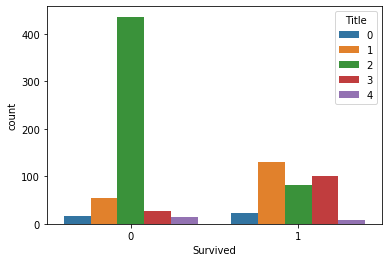

In [28]:
sns.countplot(x='Survived',hue='Title',data=df)

In [29]:
#3rd class age avg
temp = df.query('Pclass==3')
temp = temp['Age'].dropna()
print(np.mean(temp))

temp = df.query('Pclass==2')
temp = temp['Age'].dropna()
print(np.mean(temp))

temp = df.query('Pclass==1')
temp = temp['Age'].dropna()
print(np.mean(temp))

25.14061971830986
29.87763005780347
38.233440860215055


In [30]:
#for test
temp = df2.query('Pclass==3')
temp = temp['Age'].dropna()
print(np.mean(temp))

temp = df2.query('Pclass==2')
temp = temp['Age'].dropna()
print(np.mean(temp))

temp = df2.query('Pclass==1')
temp = temp['Age'].dropna()
print(np.mean(temp))

24.02794520547945
28.7775
40.91836734693877


In [31]:
def give_age(cols):
    age  = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if(pclass==1):
            return 38
        elif(pclass==2):
            return 30
        elif(pclass==3):
            return 25
    else:
        return age

In [32]:
def give_age2(cols):
    age  = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if(pclass==1):
            return 41
        elif(pclass==2):
            return 29
        elif(pclass==3):
            return 24
    else:
        return age

In [33]:
df['Age']  = df[['Age',"Pclass"]].apply(give_age,axis=1)

In [34]:
df2['Age']  = df2[['Age',"Pclass"]].apply(give_age,axis=1)

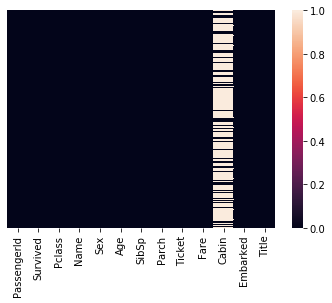

In [35]:
sns.heatmap(df.isnull(),yticklabels=False)

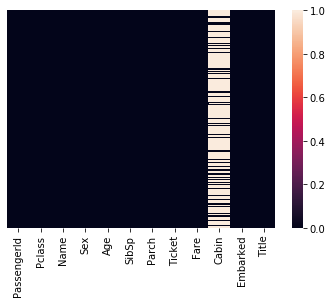

In [36]:
sns.heatmap(df2.isnull(),yticklabels=False)

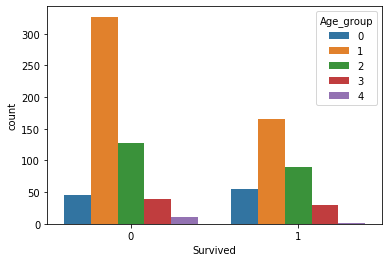

In [41]:
df['Age_group'] = pd.cut(df['Age'],5)
df.Age_group = pd.Categorical(df.Age_group)
df['Age_group'] = df.Age_group.cat.codes
df.head()

df2['Age_group'] = pd.cut(df2['Age'],5)
df2.Age_group = pd.Categorical(df2.Age_group)
df2['Age_group'] = df2.Age_group.cat.codes
df.head()
sns.countplot(x='Survived',hue='Age_group',data=df)

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2


,Survived
Family_Size,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


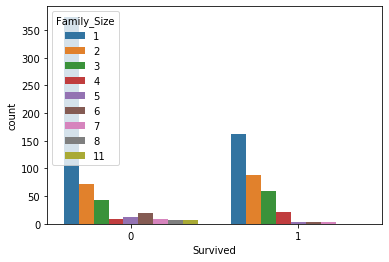

In [51]:
#New Feature FamilySize
df['Family_Size'] = df['SibSp']+df['Parch']+1
sns.countplot(x='Survived',hue='Family_Size',data=df)

df2['Family_Size'] = df2['SibSp']+df2['Parch']+1
#sns.countplot(x='Survived',hue='Family_Size',data=df2)

df[['Survived','Family_Size']].groupby(['Family_Size'],as_index='False').mean().sort_values(by='Survived', ascending=False)

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2,1


In [59]:
df['Fare_band'] = pd.qcut(df['Fare'],5)
df['Fare_band'] = pd.Categorical(df.Fare_band)
df['Fare_band'] = df.Fare_band.cat.codes

df2['Fare'].fillna((df2['Fare'].mean()), inplace=True)
df2['Fare_band'] = pd.qcut(df2['Fare'],5)
df2['Fare_band'] = pd.Categorical(df2.Fare_band)
df2['Fare_band'] = df2.Fare_band.cat.codes

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Family_Size,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,2,2,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,2,2,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2,1,1


In [60]:
df.drop('Cabin',axis=1,inplace=True)
df2.drop('Cabin',axis=1,inplace=True)

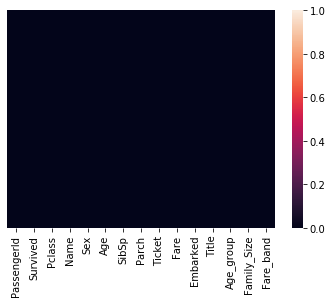

In [61]:
sns.heatmap(df.isnull(),yticklabels=False)

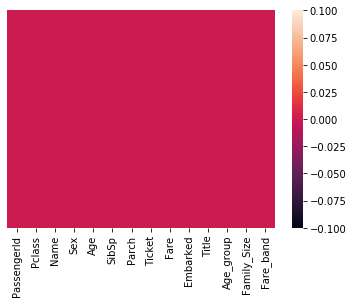

In [62]:
sns.heatmap(df2.isnull(),yticklabels=False)

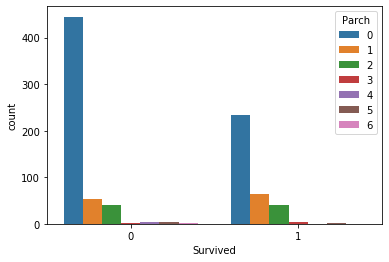

In [63]:
sns.countplot(x='Survived',hue='Parch',data=df)

In [64]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Age_group,Family_Size,Fare_band
PassengerId,1.000000,-0.005007,-0.035144,0.035318,-0.057527,-0.001652,0.012658,0.078879,0.022969,-0.040143,-0.004906
Survived,-0.005007,1.000000,-0.338481,-0.050156,-0.035322,0.081629,0.257307,-0.071174,-0.036384,0.016639,0.317783
Pclass,-0.035144,-0.338481,1.000000,-0.404262,0.083081,0.018443,-0.549500,-0.181177,-0.419593,0.065997,-0.705206
Age,0.035318,-0.050156,-0.404262,1.000000,-0.243549,-0.175264,0.121044,0.487984,0.946245,-0.254016,0.161458
SibSp,-0.057527,-0.035322,0.083081,-0.243549,1.000000,0.414838,0.159651,-0.209813,-0.228661,0.890712,0.354974
Parch,-0.001652,0.081629,0.018443,-0.175264,0.414838,1.000000,0.216225,-0.117587,-0.151666,0.783111,0.351317
Fare,0.012658,0.257307,-0.549500,0.121044,0.159651,0.216225,1.000000,-0.013273,0.145876,0.217138,0.600883
Title,0.078879,-0.071174,-0.181177,0.487984,-0.209813,-0.117587,-0.013273,1.000000,0.455291,-0.202145,0.047264
Age_group,0.022969,-0.036384,-0.419593,0.946245,-0.228661,-0.151666,0.145876,0.455291,1.000000,-0.232052,0.173361
Family_Size,-0.040143,0.016639,0.065997,-0.254016,0.890712,0.783111,0.217138,-0.202145,-0.232052,1.000000,0.418125


In [65]:
#convert categorical data 
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [68]:
#emd = pd.get_dummies(df["Embarked"],drop_first=True)
df['Embarked'] = pd.Categorical(df.Embarked)
df['Embarked'] = df.Embarked.cat.codes

df['Sex'] = pd.Categorical(df.Sex)
df['Sex'] = df.Sex.cat.codes

#emd2 = pd.get_dummies(df2["Embarked"],drop_first=True)
df2['Embarked'] = pd.Categorical(df2.Embarked)
df2['Embarked'] = df2.Embarked.cat.codes

df2['Sex'] = pd.Categorical(df2.Sex)
df2['Sex'] = df2.Sex.cat.codes

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group,Family_Size,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,3,2,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,3,2,2,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,3,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,3,3,2,2,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,3,2,2,1,1


In [70]:
df.drop(['Ticket','PassengerId','Name','Age','SibSp','Parch','Fare'],inplace=True,axis=1)
df2.drop(['Ticket','PassengerId','Name','Age','SibSp','Parch','Fare'],inplace=True,axis=1)

In [71]:
df.head()

,Survived,Pclass,Sex,Embarked,Title,Age_group,Family_Size,Fare_band
0,0,3,1,3,2,1,2,0
1,1,1,0,1,3,2,2,4
2,1,3,0,3,1,1,1,1
3,1,1,0,3,3,2,2,4
4,0,3,1,3,2,2,1,1


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [91]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1).values,df['Survived'].values,test_size=0.2)

# Logistic

In [92]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
pred = model.predict(x_test)

In [94]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0])

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[96, 19],
       [18, 46]])

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7932960893854749

In [97]:
y_pred = model.predict(df2)

In [98]:
y_pred.shape

(418,)

In [99]:
submission = pd.DataFrame({"Survived": y_pred}, index=df2.index)
submission.index.name = 'PassengerId'
submission.index+=892
submission.to_csv("submission.csv")

In [100]:
print(confusion_matrix(pd.read_csv('gender_submission.csv', index_col=0).values, y_pred))

[[229  37]
 [  7 145]]


# SVM

In [119]:
from sklearn.svm import SVC
model2 = SVC(kernel='rbf')
model2.fit(x_train,y_train)
pred_y2 = model2.predict(x_test)

In [120]:
accuracy_score(y_test,pred_y2)

0.8324022346368715

# KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(x_train,y_train)
pred_y3 = model3.predict(x_test)

In [104]:
accuracy_score(y_test,pred_y3)

0.8044692737430168

# Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(x_train,y_train)
pred_y4 = model4.predict(x_test)
accuracy_score(y_test,pred_y4)

0.8044692737430168

In [116]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators=20)
model5.fit(x_train,y_train)
pred_y5 = model5.predict(x_test)
accuracy_score(y_test,pred_y5)

0.8212290502793296

In [121]:
y_pred = model4.predict(df2)

In [122]:
submission = pd.DataFrame({"Survived": y_pred}, index=df2.index)
submission.index.name = 'PassengerId'
submission.index+=892
submission.to_csv("submission.csv")